**MNIST images Classification Using CNN (Tensorflow)**

In [0]:
# import libraries
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import Tensorflow datasets
import tensorflow_datasets as tfds

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
# Importing MNIST dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised= True, with_info= True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Loading the dataset returns metadata as well as a training dataset and test dataset.

The model is trained using train_dataset.
The model is tested against test_dataset.
The images are 28  ×  28 arrays, with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Dataset exploration**

In [71]:
num_train_examples = metadata.splits['train'].num_examples 
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples: {}'.format(num_train_examples))
print('Number of testing examples: {}'.format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


**Preprocessing Data**

Each image in the dataset is a grayscale image with a pixel value between 0 to 255. For the neural network model to work we need to normalize the dataset to the range between [0, 1]

In [0]:
# function to normalise the dataset
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels



  #applying the function to the test and the train data
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  #keeping the images in the cahce to make the training process faster
  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()

**Plotting the data**

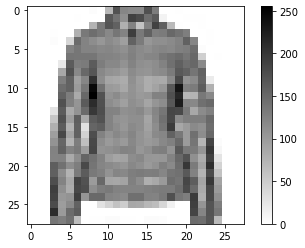

In [73]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plotting the image
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

**Building the Model**

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compiling the model**
Before training a model, compiling of the model need to be done. Arguments passed to the model are below:

**An optimizer** - It is used to change the attributes of neural network such as weights and learning rate in order to reduce the losses.\
**A loss function** - It is a method of evaluating how well an algorithm models the given data.\
**Metrics** - It is used to measure the quality of the model

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

**Training the Model**
First, we define the iteration behavior for the train dataset:

Repeat forever by specifying **dataset.repeat()** (the epochs parameter described below limits how long we perform training).\
The **dataset.shuffle()** randomizes the order so our model cannot learn anything from the order of the examples.\
And **dataset.batch()** tells model.fit to use batches of 32 images and labels when updating the model variables.

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [77]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4955 - accuracy: 0.8605
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2665 - accuracy: 0.9027
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2334 - accuracy: 0.9143
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2042 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1920 - accuracy: 0.9287
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1707 - accuracy: 0.9372
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1576 - accuracy: 0.9416
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1405 - accuracy: 0.9479
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1271 - accuracy: 0.9532
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

**Evaluating Accuracy on the Testset**

In [78]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.4159 - accuracy: 0.9023
Accuracy on test dataset: 0.9023000001907349


**Making prediction on the testset**

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [80]:
predictions.shape

(32, 10)

In [81]:
predictions[0]

array([6.1854034e-06, 5.0359631e-08, 1.5310775e-01, 7.2049659e-08,
       8.2692498e-01, 4.9806892e-09, 1.9957695e-02, 1.5374360e-07,
       3.5737460e-07, 2.7696597e-06], dtype=float32)

In [82]:
np.argmax(predictions[0])

4

In [83]:
test_labels[0]

4

**Visualizing the predictions**

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

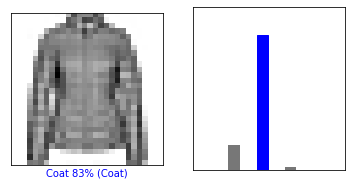

In [85]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)